### Lab | Making predictions with logistic regression

Zsanett Borsos

In this lab, you will be using the Sakila database of movie rentals.

In order to optimize our inventory, we would like to know which films will be rented next month and we are asked to create a model to predict it.

Instructions
1. Create a query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features.
2. Read the data into a Pandas dataframe.
3. Analyze extracted features and transform them. You may need to encode some categorical variables, or scale numerical variables.
4. Create a query to get the list of films and a boolean indicating if it was rented last month. This would be our target variable.
5. Create a logistic regression model to predict this variable from the cleaned data.
Evaluate the results.

In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/bank'
engine = create_engine(connection_string)

In [4]:
engine.execute("USE sakila")
engine.execute("SET sql_mode=(SELECT REPLACE(@@sql_mode, 'ONLY_FULL_GROUP_BY', ''))")

I decided to extract the movies that were rented 20 times or more. Since the database covers only a coulple of months, I am looking at the whole time period to ensure there' enough data.

In [11]:
query = """ SELECT sakila.inventory.film_id, sakila.film.title, sakila.film.rating, sakila.film.replacement_cost, sakila.film.rental_rate, COUNT(sakila.rental.rental_date) AS "Number of times movie was rented" FROM sakila.rental
JOIN sakila.inventory ON
sakila.rental.inventory_id = sakila.inventory.inventory_id
JOIN sakila.film ON
sakila.inventory.film_id = sakila.film.film_id
GROUP BY sakila.film.title
HAVING COUNT(sakila.rental.rental_date) >= '20'
ORDER BY COUNT(sakila.rental.rental_date) DESC;"""

data = pd.read_sql_query(query, engine)
data

,film_id,title,rating,replacement_cost,rental_rate,Number of times movie was rented
0,103,BUCKET BROTHERHOOD,PG,27.99,4.99,34
1,738,ROCKETEER MOTHER,PG-13,27.99,0.99,33
2,331,FORWARD TEMPLE,NC-17,25.99,2.99,32
3,382,GRIT CLOCKWORK,PG,21.99,0.99,32
4,489,JUGGLER HARDLY,PG-13,14.99,0.99,32
...,...,...,...,...,...,...
333,827,SPICE SORORITY,NC-17,22.99,4.99,20
334,845,STEPMOM DREAM,NC-17,9.99,4.99,20
335,851,STRAIGHT HOURS,R,19.99,0.99,20
336,906,TRAMP OTHERS,PG,27.99,0.99,20


In [12]:
#Standardize header names
data.columns = [column.lower().replace(' ', '_') for column in data.columns]
data

,film_id,title,rating,replacement_cost,rental_rate,number_of_times_movie_was_rented
0,103,BUCKET BROTHERHOOD,PG,27.99,4.99,34
1,738,ROCKETEER MOTHER,PG-13,27.99,0.99,33
2,331,FORWARD TEMPLE,NC-17,25.99,2.99,32
3,382,GRIT CLOCKWORK,PG,21.99,0.99,32
4,489,JUGGLER HARDLY,PG-13,14.99,0.99,32
...,...,...,...,...,...,...
333,827,SPICE SORORITY,NC-17,22.99,4.99,20
334,845,STEPMOM DREAM,NC-17,9.99,4.99,20
335,851,STRAIGHT HOURS,R,19.99,0.99,20
336,906,TRAMP OTHERS,PG,27.99,0.99,20


In [13]:
data.rating.unique()

array(['PG', 'PG-13', 'NC-17', 'G', 'R'], dtype=object)

In [14]:
data = pd.get_dummies(data, columns=['rating'])
data

,film_id,title,replacement_cost,rental_rate,number_of_times_movie_was_rented,rating_G,rating_NC-17,rating_PG,rating_PG-13,rating_R
0,103,BUCKET BROTHERHOOD,27.99,4.99,34,0,0,1,0,0
1,738,ROCKETEER MOTHER,27.99,0.99,33,0,0,0,1,0
2,331,FORWARD TEMPLE,25.99,2.99,32,0,1,0,0,0
3,382,GRIT CLOCKWORK,21.99,0.99,32,0,0,1,0,0
4,489,JUGGLER HARDLY,14.99,0.99,32,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
333,827,SPICE SORORITY,22.99,4.99,20,0,1,0,0,0
334,845,STEPMOM DREAM,9.99,4.99,20,0,1,0,0,0
335,851,STRAIGHT HOURS,19.99,0.99,20,0,0,0,0,1
336,906,TRAMP OTHERS,27.99,0.99,20,0,0,1,0,0


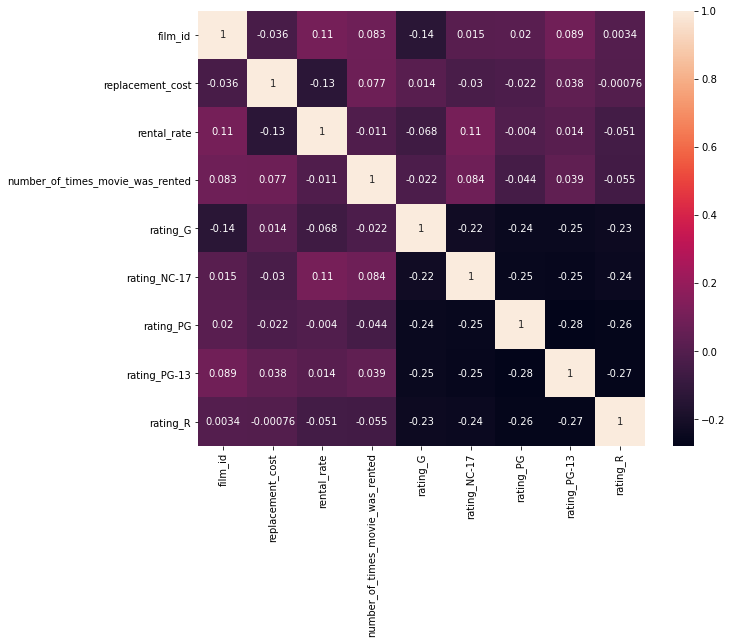

In [17]:
corr_matrix=data.corr(method='pearson') 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()